    Authot: Mangesh Divate
    Dataset:- Image captured using jio-phone camera 
    problem:-Binary Classification 
    Classes:- (Cube,no Cube)
    

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
#if you do not add following two lines   then error may come is few version with tf with backend
#for more discription check "https://github.com/fchollet/keras/issues/3945"
from keras import backend as K
K.set_image_dim_ordering('th')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


Using TensorFlow backend.


In [6]:

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
#model.fit(x_train, y_train, epochs=5, batch_size=32)

Found 128 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [8]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
#model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/15
  8/125 [>.............................] - ETA: 4:27 - loss: 0.0924 - acc: 0.9609 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00

In [9]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# later...
''' 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
'''

' \n# load json and create model\njson_file = open(\'model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n\n\nloaded_model.compile(loss=\'binary_crossentropy\', optimizer=\'rmsprop\', metrics=[\'accuracy\'])\nscore = loaded_model.evaluate(X, Y, verbose=0)\nprint("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))\n'

[[1]]


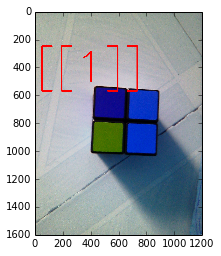

In [27]:
'''import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
ip="data/train/cube/IMG_0099.jpg"
img = cv2.imread(ip)
img_res = cv2.imread(ip)
img = cv2.resize(img,(150, 150))
img = np.reshape(img,[1,3,150, 150])
classes = model.predict_classes(img)
cv2.putText(img_res,str(classes),(10,500), cv2.FONT_HERSHEY_SIMPLEX, 10,(255,0,0),10)

plt.imshow(img_res)
print classes

'''



In [ ]:
'''import numpy as np
import cv2
#im = ["cf.jpg","ch.jpg","nc.jpg"]
im = [1,2,3]
res = []
for i in im :
    img = cv2.imread(im[i] )
    img = cv2.resize(img,(150, 150))
    img = np.reshape(img,[1,3,150, 150])
    classes = model.predict_classes(img)
    res.append((classes,im[i]))'''

In [61]:
print history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']


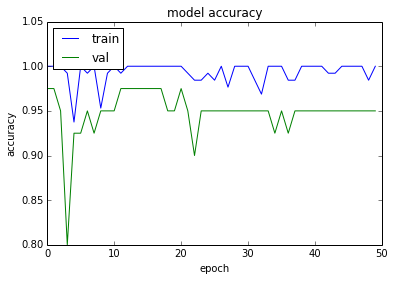

In [63]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

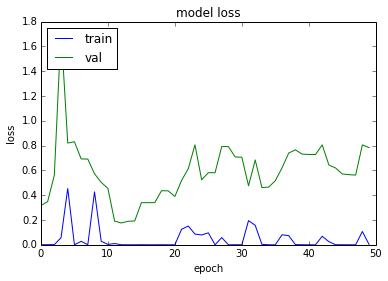

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

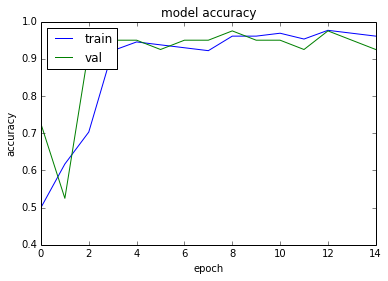

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

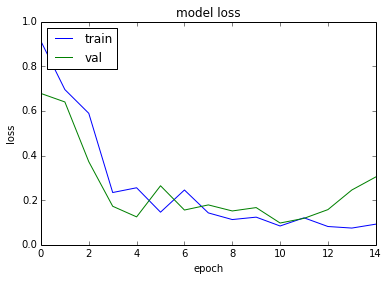

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Help on built-in function imwrite in module cv2:

imwrite(...)
    imwrite(filename, img[, params]) -> retval



In [79]:


#help(os.listdir)
#os.walk("data/train/cube/",onerror=None)
list_train_cube = os.listdir("data/train/cube/")
list_train_nocube = os.listdir("data/train/nocube/")
#list_train_cube=[1,2,3]
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
for i in enumerate(list_train_nocube):
    print i
    ip="data/train/nocube/"+i[1]
    img = cv2.imread(ip)
    
    img = cv2.resize(img,(150, 150))
    img = np.reshape(img,[1,3,150, 150])
    classes = model.predict_classes(img)
    
    img_res = cv2.imread(ip)
    cv2.putText(img_res,str(classes),(10,500), cv2.FONT_HERSHEY_SIMPLEX, 10,(255,0,0),10)
    #cv2.imwrite("result/train_nocube.png",img)
    cv2.imwrite("result1/train_nocube%d.jpg"%i[0],img_res)

#plt.imshow(img_res)
#print classes


(0, 'IMG_0211.jpg')
(1, 'IMG_0200.jpg')
(2, 'IMG_0162.jpg')
(3, 'IMG_0230.jpg')
(4, 'IMG_0155.jpg')
(5, 'IMG_0227.jpg')
(6, 'IMG_0160.jpg')
(7, 'IMG_0169.jpg')
(8, 'IMG_0231.jpg')
(9, 'IMG_0152.jpg')
(10, 'IMG_0219.jpg')
(11, 'IMG_0168.jpg')
(12, 'IMG_0205.jpg')
(13, 'IMG_0163.jpg')
(14, 'IMG_0235.jpg')
(15, 'IMG_0220.jpg')
(16, 'IMG_0233.jpg')
(17, 'IMG_0191.jpg')
(18, 'IMG_0175.jpg')
(19, 'IMG_0192.jpg')
(20, 'IMG_0209.jpg')
(21, 'IMG_0177.jpg')
(22, 'IMG_0183.jpg')
(23, 'IMG_0196.jpg')
(24, 'IMG_0190.jpg')
(25, 'IMG_0184.jpg')
(26, 'IMG_0216.jpg')
(27, 'IMG_0164.jpg')
(28, 'IMG_0178.jpg')
(29, 'IMG_0166.jpg')
(30, 'IMG_0210.jpg')
(31, 'IMG_0165.jpg')
(32, 'IMG_0215.jpg')
(33, 'IMG_0203.jpg')
(34, 'IMG_0148.jpg')
(35, 'IMG_0218.jpg')
(36, 'IMG_0236.jpg')
(37, 'IMG_0154.jpg')
(38, 'IMG_0167.jpg')
(39, 'IMG_0206.jpg')
(40, 'IMG_0181.jpg')
(41, 'IMG_0157.jpg')
(42, 'IMG_0194.jpg')
(43, 'IMG_0232.jpg')
(44, 'IMG_0179.jpg')
(45, 'IMG_0182.jpg')
(46, 'IMG_0158.jpg')
(47, 'IMG_0208.jpg')
(4

hello 2


Untitled.ipynb  cf.jpg  data.tar.gz  model.json  preview/
a.txt           ch.jpg  frame.png    myfig.png*  result/
ad.ipynb        data/   logo.png     nc.jpg      untitled.txt
